# Séries Temporais

## Dados
Dados localizados na pasta: D:_SIA_\estudo\udemy\cientista-de-dados\02-estatistica-04

Arquivos para upload:
- 81.Dados.zip
- Disponível também através do link https://github.com/ronivaldo/udemy-curso-cientista_dados/raw/master/data/81.Dados.zip

Conteúdo do arquivo:
- AirPassengers.csv

In [0]:
import os  

# verifica se upload ja foi realizado
if not os.path.isfile('./81.Dados.zip'):
  # obtem o arquivo do Github
  !wget https://github.com/ronivaldo/udemy-curso-cientista_dados/raw/master/data/81.Dados.zip

# verifica se upload ja foi realizado
if not os.path.isfile('./AirPassengers.csv'):
  # descompacta o arquivo 66.Dados.zip
  !unzip -o 81.Dados.zip

# Séries Temporais - Introdução

## Análise de Séries Temporais

Estudar o comportamento de uma variável contínua ao longo do tempo

O Intervalo de coleta é regular

O Intervalo deve ser sempre o mesmo.
- Único para toda a série
- Ex: milissegundos, dias, horas etc

## Séries Temporais

Uma série temporal é uma mesma mesma variável

Deve estar relacionada a um intervalo de tempo

Dependência (ordem) no tempo

Não é possível coletar mais de uma amostra a cada intervalo

Supõe que exista alguma dependência entre os intervalos (auto correlação)

## Por que analisar séries temporais?

Explicação / Compreensão de características importantes

Previsão

Controle

Não se busca relação causa/efeito

## Aplicações

Aplicações:
- Econometria
- Previsão do tempo
- Previsões Financeiras
- Previsão de erupão vulcânica

## Tipos 

Tipos:
- Estacionárias:
  - Flutuam em torno de uma mesma média e variância
- Não estacionárias


Podem ser:
- Estocásticas:
  - Fórmula + Fator Aleatório que não pode ser explicado (maioria dos casos)
- Determinísticas:
  - Explicadas através de uma Fórmula/Funão


## Componentes

Valores observados:
- Tendência
- Sazonalidade
- Aleatoriedade


![alt text](https://github.com/ronivaldo/udemy-curso-cientista_dados/raw/master/resources/series_temporais.png "Séries Temporais")

## Decomposição

Decomposição de séries temporais:
- observada
- tendência
- sazonalidade
- componente aleatória

![alt text](https://github.com/ronivaldo/udemy-curso-cientista_dados/raw/master/resources/series_temporais_decomposicao.png "Decomposição")



# Python: Explorando

In [0]:
# 86. Python: Explorando

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

base = pd.read_csv('AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
print('tipos de dados')
print(base.dtypes)

tipos de dados
Month          object
#Passengers     int64
dtype: object


In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  index_col = 'Month', date_parser = dateparse)

base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
print('tipos de dados')
print(base.dtypes)

tipos de dados
#Passengers    int64
dtype: object


In [0]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [0]:
# mudar o tipo DataFrame para o tipo Series
ts = base['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [0]:
print('tipos de dados')
print(ts.dtypes)

tipos de dados
int64


In [0]:
print('2nd row')
ts[1]

2nd row


118

In [0]:
print('1949-02')
ts['1949-02']

1949-02


Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [0]:
from datetime import datetime
print('1949-02')
ts[datetime(1949,2,1)]

1949-02


118

In [0]:
print('from 1950-01-01 to 1950-07-31')
ts['1950-01-01':'1950-07-31']


from 1950-01-01 to 1950-07-31


Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [0]:
print('until 1950-07-31')
ts[:'1950-07-31']

until 1950-07-31


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [0]:
print('year 1950')
ts['1950']

year 1950


Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [0]:
min = ts.index.min()
max = ts.index.max()
print('min={}, max={}'.format(min, max))

min=1949-01-01 00:00:00, max=1960-12-01 00:00:00


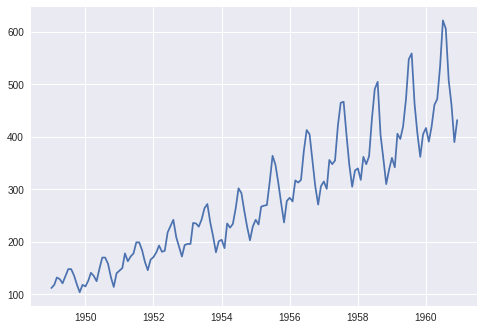

In [0]:
plt.plot(ts)

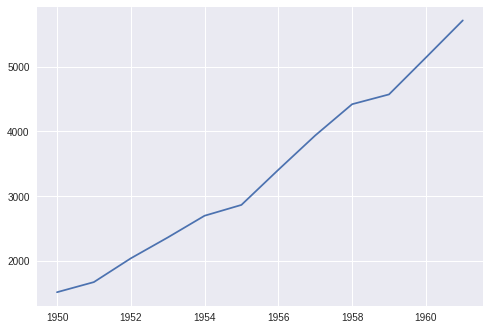

In [0]:
# resample para ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

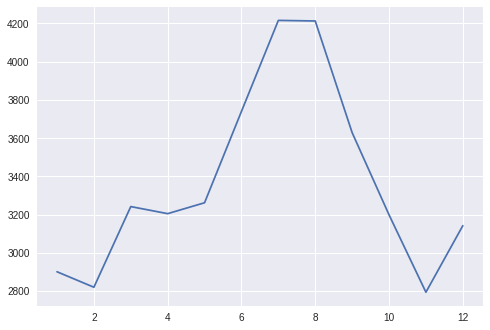

In [0]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

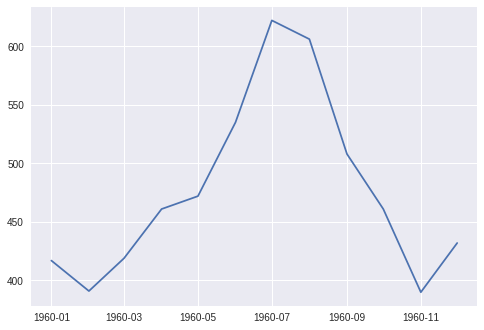

In [0]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

# Python: Decomposição

In [0]:
# 88. Python: Decomposição

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  index_col = 'Month', date_parser = dateparse)
base.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
# convert to time series
ts = base['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

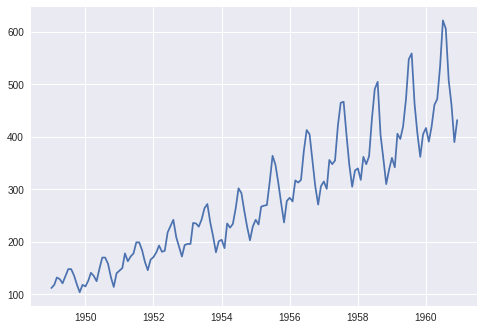

In [0]:
plt.plot(ts)

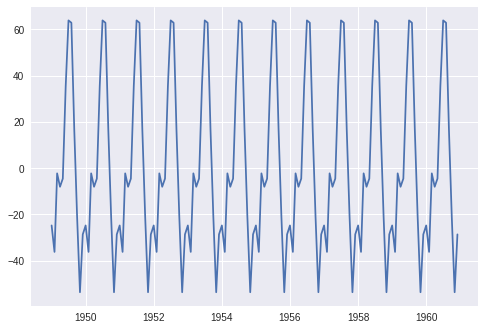

In [0]:
decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

plt.plot(sazonal)

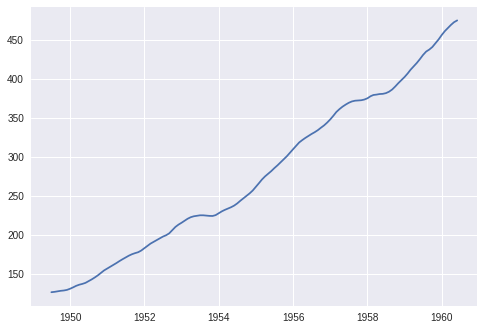

In [0]:
plt.plot(tendencia)

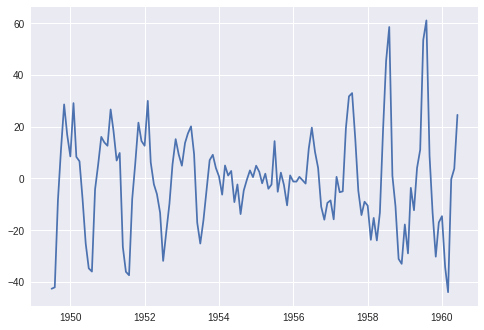

In [0]:
plt.plot(aleatorio)

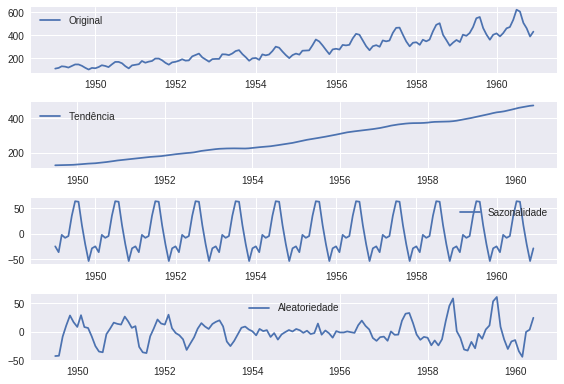

In [0]:
# plt.subplot(4,1,1) 4=4 linhas, 1 = 1 unica coluna, 1 = primeiro slot
plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label='Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label='Aleatoriedade')
plt.legend(loc = 'best')

plt.tight_layout()


# Python: Previsão - Parte I

In [0]:
# 90. Python: Previsão - Parte I

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  index_col = 'Month', date_parser = dateparse)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


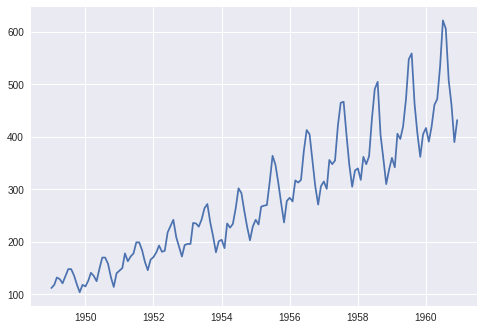

In [0]:
ts = base['#Passengers']
plt.plot(ts)

media geral = 280.2986111111111
media 1960 = 476.1666666666667
media 12 primeiros meses = 126.66666666666667


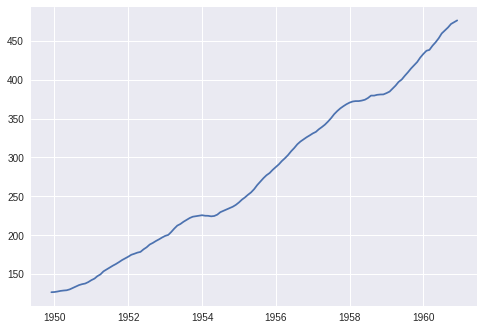

In [0]:
# previsoes para o futuro
media_geral = ts.mean()
print('media geral = {}'.format(media_geral))

media_1960 = ts['1960-01-01':'1960-12-31'].mean()
print('media 1960 = {}'.format(media_1960))

# media dos 12 primeiros meses
media_12_primeiros_meses = ts[0:12].mean()
print('media 12 primeiros meses = {}'.format(media_12_primeiros_meses))

# medias moveis
# window = janela de dados que serao usados para a conta
#    neste caso os 12 primeiros meses serão usados para a primeira media
#    e assim por diante
media_movel = ts.rolling(window = 12).mean()
plt.plot(media_movel)

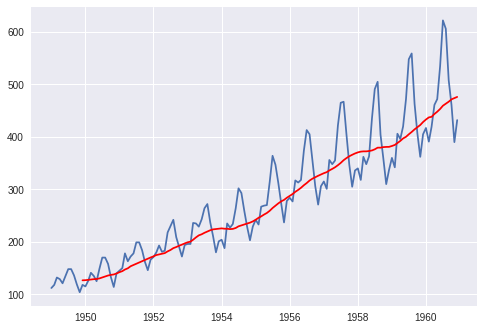

In [0]:
plt.plot(ts)
plt.plot(media_movel, color='red')

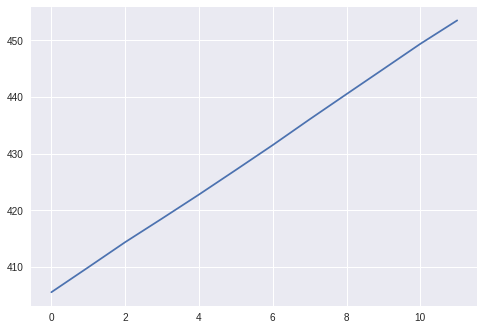

In [0]:
# prever os proximos 12 meses
previsoes_media = []
for i in range(1, 13):
  superior = len(media_movel) - i
  inferior = superior - 11
  #print(inferior)
  #print(superior)
  #print('-----')
  previsoes_media.append(media_movel[inferior:superior].mean())

# inverte
previsoes_media = previsoes_media[::-1]
  
plt.plot(previsoes_media)
  

# Python: Previsão - Parte II

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  index_col = 'Month', date_parser = dateparse)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


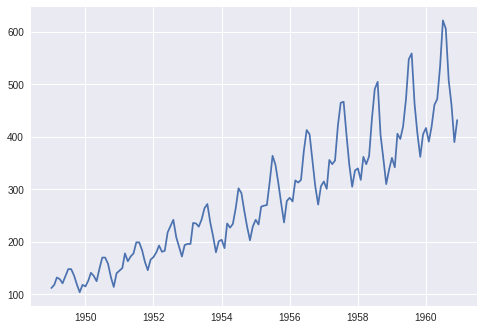

In [0]:
ts = base['#Passengers']
plt.plot(ts)

In [0]:
# p = numero dos termos auto regressivo
# q = numero do moving average (media movel)
# d = crencas nao sazonais
p = 2
q = 1
d = 2
modelo = ARIMA(ts.astype(float), order=(2,1,2))
modelo_treinado = modelo.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Tue, 09 Apr 2019   AIC                           1344.043
Time:                        19:52:47   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.532      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9999      0.068     14.812      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [0]:
previsoes = modelo_treinado.forecast(steps=12)[0]
print('previsoes para os proximos 12 mese=')
print(previsoes)

previsoes para os proximos 12 mese=
[433.1060818  450.86249364 479.77654364 511.93353448 539.28728752
 555.77753834 558.73582084 549.27642226 531.66206421 511.90319026
 496.02683086 488.49797825]


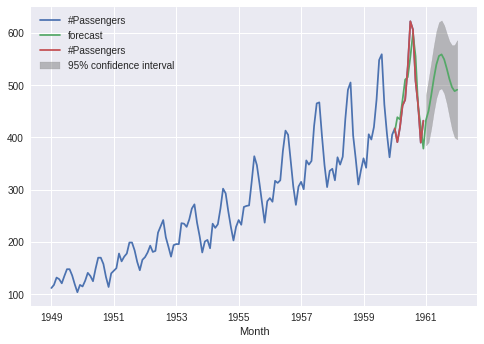

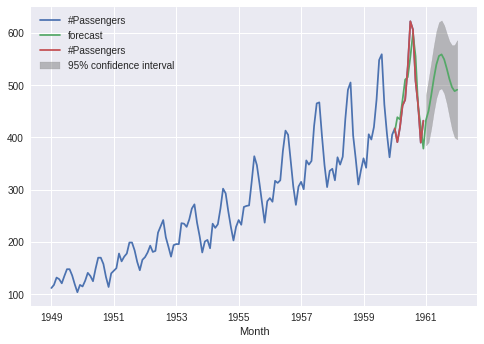

In [0]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1962-01-01',
                            ax = eixo, plot_insample = True)

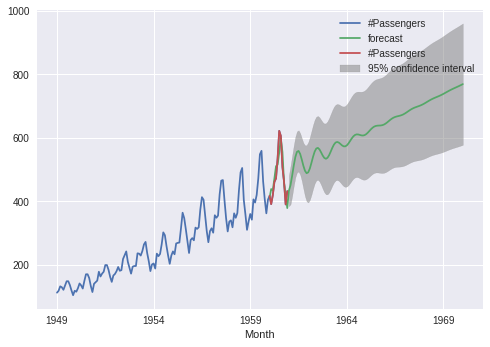

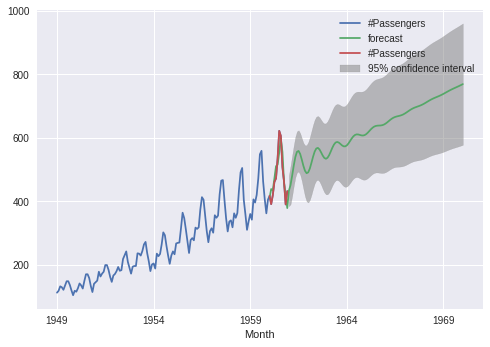

In [0]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1970-01-01',
                            ax = eixo, plot_insample = True)

# Pyramid ARIMA - PMD ARIMA

Pyramid is a no-nonsense statistical Python library with a solitary objective: bring R's auto.arima functionality to Python. Pyramid operates by wrapping statsmodels.tsa.ARIMA and statsmodels.tsa.statespace.SARIMAX into one estimator class and creating a more user-friendly estimator interface for programmers familiar with scikit-learn.

Link OLD:

https://pypi.org/project/pyramid-arima/

New:
https://github.com/tgsmith61591/pmdarima


## Installation

Pyramid is on pypi under the package name pyramid-arima and can be downloaded via pip:

Old:

```bash
$ pip install pyramid-arima
```

To ensure the package was built correctly, import the following module in python:

```python

from pyramid.arima import auto_arima

```

New:

```bash
$ pip install pmdarima
```

To ensure the package was built correctly, import the following module in python:

```python

from pmdarima.arima import auto_arima

```

In [0]:
!pip install pyramid-arima

In [0]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [0]:
# escolhe os melhores parametros de forma automatica
modelo_auto = auto_arima(ts, n = 12, seasonal = 12, trace = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1344.044, BIC=1361.821, Fit time=0.543 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1415.278, BIC=1421.203, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1403.473, BIC=1412.361, Fit time=0.063 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1398.827, BIC=1407.716, Fit time=0.117 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1371.827, BIC=1386.641, Fit time=0.192 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1361.693, BIC=1376.507, Fit time=0.348 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1396.121, BIC=1407.972, Fit time=0.176 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.468 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [0]:
# o melhor parametro esta no resultado SARIMAX(2, 1, 2)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Tue, 09 Apr 2019   AIC                           1344.044
Time:                        19:57:01   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6619      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.890      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.755      0.000      -0.958      -0.861
ma.L1         -1.9079      0.355     -5.374      0.000      -2.604      -1.212
ma.L2          0.9977      0.371      2.690      0.007       0.271       1.725
sigma2       611.7507    246.848      2.478      0.013     127.937    1095.565
===================================================================================
Ljung-Box (Q):                      358.18   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

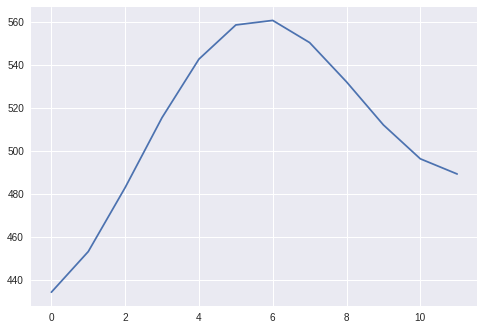

In [0]:
proximos_12 = modelo_auto.predict(n_periods = 12)
plt.plot(proximos_12)

## ARIMA

Depois de obter os parametros atraves do pyramid arima, é possível utilizar o model arima_model para fazer as previsões

In [0]:
p = 2
q = 1
d = 2
modelo = ARIMA(ts.astype(float), order=(2,1,2))
modelo_treinado = modelo.fit()
previsoes = modelo_treinado.forecast(steps=12)[0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


# Quiz: Série Temporal

## Question 1:

Entre os motivos para analisar dados temporais, qual opção é falsa?

R - Buscar relação de causa e efeito

## Question 2:

Entre os componentes de uma série temporal, um deles mostra qual a propensão dos dados em intervalos de tempos futuros. Qual componente é este?

R - Tendência

## Question 3:

Qual componente, em um serie temporal, não pode ser explicado através de uma equação/fórmula?

R - Aleatoriedade

## Question 4:

Os gráficos na imagem, mostram, respectivamente, quais componentes de uma série temporal?

R - Tendência, Sazonalidade e Aleatoriedade

## Question 5:

Qual afirmação é verdadeira sobre a diferença entre series temporais estocásticas e determinísticas?

R - Estocásticas possuem um componente aleatório, o que torna sua previsão mais difícil. As determinísticas podem ser explicadas por uma função.

